In [104]:
import os
import numpy as np

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

np.set_printoptions(precision=4)
seg_length = 500

TensorFlow version: 2.13.0


In [105]:
# x = None
# y = None

# for db in ["chf2db", "chfdb"]:
#     for record in os.listdir(f'data/{db}/rr'):
#         rr = np.loadtxt(f'data/{db}/rr/{record}')
#         n_segments = rr.shape[0] // seg_length
#         rr = rr[:n_segments*seg_length].reshape((n_segments, seg_length))
#         labels = np.c_[np.ones(n_segments), np.zeros(n_segments)]

#         if x is None or y is None:
#             x = rr
#             y = labels
#         else:
#             x = np.r_[rr, x]
#             y = np.r_[labels, y]


# for db in ["nsrdb", "nsr2db", "fantasia"]:
#     for record in os.listdir(f'data/{db}/rr'):
#         rr = np.loadtxt(f'data/{db}/rr/{record}')
#         n_segments = rr.shape[0] // seg_length
#         rr = rr[:n_segments*seg_length].reshape((n_segments, seg_length))
#         labels = np.c_[np.zeros(n_segments), np.ones(n_segments)]

#         if x is None or y is None:
#             x = rr
#             y = labels
#         else:
#             x = np.r_[rr, x]
#             y = np.r_[labels, y]

# x.shape, y.shape

X = None
y = None

db1_pos = ['chfdb']
db1_neg = ['nsrdb', 'fantasia']
db2_pos = ['chf2db']
db2_neg = ['nsr2db']

for db in db1_pos:
    for record in os.listdir(f'data/{db}/rr'):
        rr = np.loadtxt(f'data/{db}/rr/{record}')
        n_segments = rr.shape[0] // seg_length
        rr = rr[:n_segments*seg_length].reshape((n_segments, seg_length))
        labels = np.c_[np.ones(n_segments), np.zeros(n_segments)]

        if X is None or y is None:
            X = rr
            y = labels
        else:
            X = np.r_[rr, X]
            y = np.r_[labels, y]

for db in db1_neg:
    for record in os.listdir(f'data/{db}/rr'):
        rr = np.loadtxt(f'data/{db}/rr/{record}')
        n_segments = rr.shape[0] // seg_length
        rr = rr[:n_segments*seg_length].reshape((n_segments, seg_length))
        labels = np.c_[np.zeros(n_segments), np.ones(n_segments)]

        if X is None or y is None:
            X = rr
            y = labels
        else:
            X = np.r_[rr, X]
            y = np.r_[labels, y]

X.shape, y.shape

((7397, 500), (7397, 2))

In [106]:
# # from sklearn.model_selection import train_test_split
# # from sklearn import preprocessing


# # x = preprocessing.scale(x, axis=1)
# # # scaler = preprocessing.StandardScaler().fit_transform(x)

# # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=410)
# # X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=410)

# # X_train.shape, X_valid.shape, X_test.shape



# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing

# X = preprocessing.scale(X, axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=410)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=410)

# X_train.shape, X_valid.shape, X_test.shape


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
 
# normalize?
# X = (X - X.mean()) / X.std()
X_raw = X.copy()
X = preprocessing.scale(X, axis=1)
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=410)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.1, random_state=410)
 
 
_, X_test_raw, _, y_test_raw = train_test_split(
    X_raw, y, test_size=0.1, random_state=410)
 
# scaler = preprocessing.StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_valid = scaler.transform(X_valid)
# X_test = scaler.transform(X_test)
 
X_train.shape, X_valid.shape, X_test.shape

((5991, 500), (666, 500), (740, 500))

In [107]:
# np.unique(y_train[:,0], return_counts=True)

In [108]:
# inputs = tf.keras.layers.Input(shape=(500, 1))

# def inception_lstm(inputs):
#     a = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=True))(inputs)
#     a = tf.keras.layers.LSTM(5, return_sequences=True)(a)

#     b = tf.keras.layers.Conv1D(5, kernel_size=1)(inputs)
#     b = tf.keras.layers.Conv1D(5, kernel_size=3)(b)

#     c = tf.keras.layers.Conv1D(5, kernel_size=1)(inputs)
#     c = tf.keras.layers.Conv1D(5, kernel_size=5)(c)

#     d = tf.keras.layers.MaxPool1D(3)(inputs)
#     d = tf.keras.layers.Conv1D(5, kernel_size=1)(d)

#     concat = tf.keras.layers.Concatenate(1)([a, b, c, d])
#     return concat

# layer1 = inception_lstm(inputs)
# layer2 = inception_lstm(layer1)
# dropout = tf.keras.layers.Dropout(0.2)(layer2)
# flattened = tf.keras.layers.Flatten()(dropout)
# output = tf.keras.layers.Dense(2, activation='sigmoid')(flattened)

# model = tf.keras.Model(inputs, output)
# model.summary()

In [109]:
# loss_fn = tf.keras.losses.BinaryCrossentropy()
# model.compile(optimizer='adam',
#               loss=loss_fn,
#               metrics=['accuracy'])

In [110]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# model.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid),
#           batch_size=128, epochs=100, callbacks=[callback])

In [111]:
# model.save('model_lstm.keras')
# lstm_model = model

In [112]:
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import accuracy_score

# y_pred_lstm = lstm_model.predict(X_test).argmax(axis=1)

In [113]:
# print(recall_score(y_test.argmax(axis=1), y_pred_lstm))
# print(precision_score(y_test.argmax(axis=1), y_pred_lstm))
# print(accuracy_score(y_test.argmax(axis=1), y_pred_lstm))

In [114]:
from tensorflow.keras.models import load_model

lstm_model = load_model("model4 3.keras", compile=False)

In [115]:
lstm_model.summary()

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

y_pred_lstm = lstm_model.predict(X_test).argmax(axis=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500, 1)]             0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 500, 10)              280       ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 conv1d (Conv1D)             (None, 500, 5)               10        ['input_1[0][0]']             
                                                                                                  
 conv1d_2 (Conv1D)           (None, 500, 5)               10        ['input_1[0][0]']         

In [116]:
print(recall_score(y_test.argmax(axis=1), y_pred_lstm))
print(precision_score(y_test.argmax(axis=1), y_pred_lstm))
print(accuracy_score(y_test.argmax(axis=1), y_pred_lstm))

0.9156908665105387
0.9376498800959233
0.9162162162162162


Model 2: CNN

In [117]:
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from sklearn.metrics import f1_score, accuracy_score

def get_model():
    nclass = 2
    inp = tf.keras.layers.Input(shape=(500, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = tf.optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['acc'])
    model.summary()
    return model

model = get_model()
file_path = "baseline_cnn.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

model.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid),
          batch_size=128, epochs=100, callbacks=callbacks_list)

model.load_weights(file_path)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 conv1d_16 (Conv1D)          (None, 496, 16)           96        
                                                                 
 conv1d_17 (Conv1D)          (None, 492, 16)           1296      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 246, 16)           0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 246, 16)           0         
                                                                 
 conv1d_18 (Conv1D)          (None, 244, 32)           1568      
                                                           

In [118]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

cnn_model = model

pred_test_cnn = cnn_model.predict(X_test)
pred_test_cnn = np.argmax(pred_test_cnn, axis=1)

print(recall_score(y_test.argmax(axis=1), pred_test_cnn ))
print(precision_score(y_test.argmax(axis=1), pred_test_cnn ))
print(accuracy_score(y_test.argmax(axis=1), pred_test_cnn ))

24/24 [==============================] - 0s 6ms/step
0.9063231850117096
0.9579207920792079
0.922972972972973


In [119]:
import numpy as np 
import matplotlib.pyplot as plt
import stumpy
import pandas as pd
from scipy import signal
from sklearn.linear_model import Ridge
from scipy.spatial import distance
from fatf.utils.kernels import exponential_kernel 

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/Users/rithikbansal/v2.0/listen_to_your_heart/LIMESegment')

from Utils.explanations import LIMESegment, NEVES, LEFTIST, NNSegment, RBP, background_perturb
from  Utils.data import loadUCRDataID
from  Utils.models import *
from  Utils.metrics import *

Actual, CNN, LSTM
[1. 0.] 0 0
4/4 [==============================] - 0s 57ms/step
10
[1.0, 0.99999, 0.273125698484601, 0.32434152868505617, 0.9372501266738337, 0.11006757340805146]
[ 0.2276 -0.0116 -0.0032  0.0738  0.2133  0.025 ]
Comparision of CNN model. Actual: heart failure risk, predicted: heart failure risk


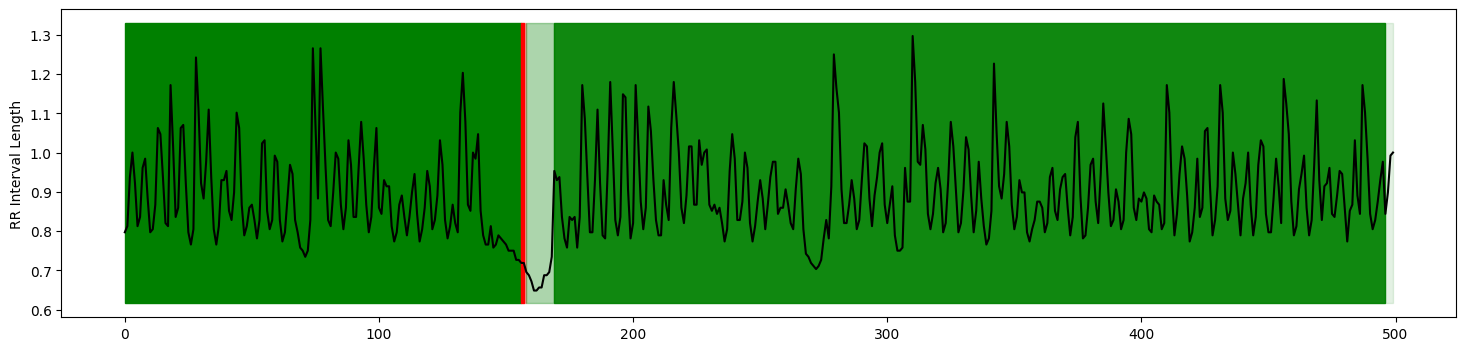

[0.8925208202846756, 0.4447438753736798, 0.03514996836335986, 0.99999, 1.0, 0.03357032086962679]
[ 0.3926 -0.0218  0.0155 -0.0491  0.4399  0.0148]
Comparision of LSTM model. Actual: heart failure risk, predicted: heart failure risk


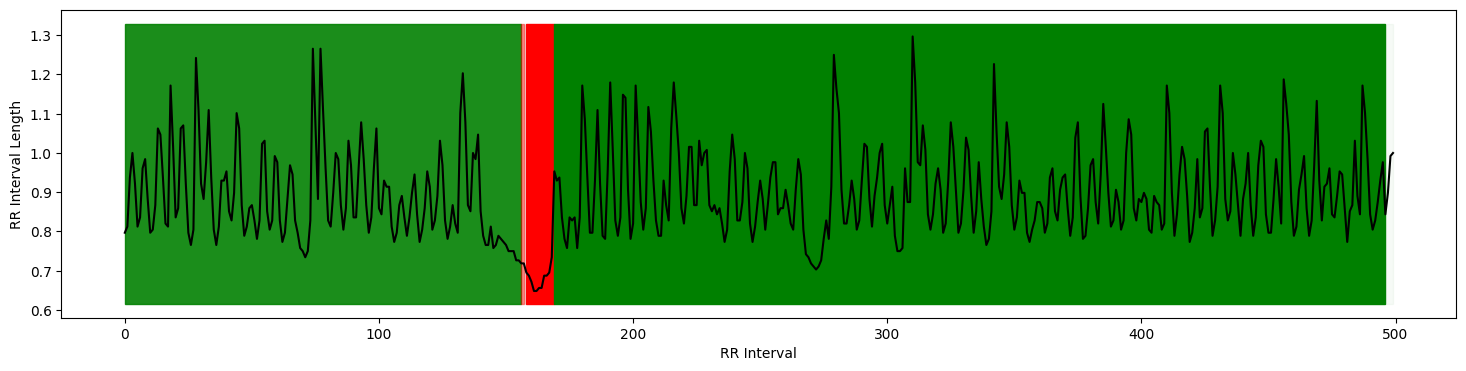

In [217]:
index = 112
print("Actual, CNN, LSTM")
print(y_test[index], pred_test_cnn[index], y_pred_lstm[index])
cnn_exp = LIMESegment(X_test[index], cnn_model, 'class', 'dtw', 100, 3, 5)
lstm_exp = LIMESegment(X_test[index], lstm_model, 'class', 'dtw', 100, 3, 5)

import random
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap


random_test_data_points = {}

for _ in range(10):
    index = random.randint(0, min(len(y_test_raw),len(X_test)))
    cnn_exp = LIMESegment(X_test[index], cnn_model, 'class', 'dtw', 100, 3, 5)
    lstm_exp = LIMESegment(X_test[index], lstm_model, 'class', 'dtw', 100, 3, 5)

    random_test_data_points[index] = [(y_test_raw[index], pred_test_cnn[index], y_pred_lstm[index]), cnn_exp, lstm_exp]

print(len(random_test_data_points))
labels_for_plots = ['healthy heart', 'heart failure risk']

def generate_plots(data_point, ind):
    actual_prediction = data_point[0][0]
    cnn_prediction = data_point[0][1]
    lstm_prediction = data_point[0][2]

    cnn_exp = data_point[1]
    lstm_exp = data_point[2]
    
    all_data = X_test_raw[ind]

    #Plotting CNN data 
    color_intensity = cnn_exp[0][int(cnn_prediction)]
    segment_indices = cnn_exp[1]

    normalized_color_intensity = np.zeros_like(color_intensity)

    positive_values = color_intensity[color_intensity > 0]
    negative_values = color_intensity[color_intensity < 0]

    min_positive, max_negative = 0, 0
    max_positive = 0
    min_negative = None

    if len(positive_values) > 0:
        min_positive = np.min(positive_values)
        max_positive = np.max(positive_values)
        scaled_positive = positive_values / max_positive
        normalized_color_intensity[color_intensity > 0] = scaled_positive
    else:
        scaled_positive = np.zeros_like(color_intensity)

    if len(negative_values) > 0:
        max_negative = np.max(negative_values)
        min_negative = np.min(negative_values)
        scaled_negative = negative_values / np.abs(min_negative)
        normalized_color_intensity[color_intensity < 0] = -scaled_negative
    else:
        scaled_negative = np.zeros_like(color_intensity)

    # normalized_color_intensity = np.zeros_like(color_intensity)
    # normalized_color_intensity[color_intensity > 0] = scaled_positive

    normalized_color_intensity = [(normalized_color_intensity[l] + 0.00001) if color_intensity[l] > 0 and (normalized_color_intensity[l] < 1) else normalized_color_intensity[l] for l in range(len(color_intensity))]
    normalized_color_intensity = [(normalized_color_intensity[l] - 0.00001) if color_intensity[l] < 0 and (normalized_color_intensity[l] > -1) else normalized_color_intensity[l] for l in range(len(color_intensity))]


    print(normalized_color_intensity)
    print(color_intensity)

    cmap_pos = LinearSegmentedColormap.from_list('custom_colormap', [(0, 'green'), (min_positive, 'green'),
                                                            (max_positive, 'green'),(1, 'green')])
    cmap_neg = LinearSegmentedColormap.from_list('custom_colormap', [(0, 'red'), (min_positive, 'red'),
                                                            (max_positive, 'red'),(1, 'red')])


    segment_collection = []
    fig, ax = plt.subplots(figsize=(18,4))
    ax.plot(range(len(all_data)), all_data, color='black', label='RR interval data')

    for i in range(len(color_intensity)):
        start = segment_indices[i]
        end = segment_indices[i+1]
        intensity = color_intensity[i]
        end = end if end >= 0 else len(all_data) - 1

        color = None
        if color_intensity[i] < 0:
            color = cmap_neg(normalized_color_intensity[i])
        else:
            color = cmap_pos(normalized_color_intensity[i])
        
        width = end - start

        segment = Rectangle((start, ax.get_ylim()[0]), width, ax.get_ylim()[1] - ax.get_ylim()[0], alpha=abs(normalized_color_intensity[i]), color=color, label=f'Segment: {start}-{end}. Intensity: {intensity: .4f}')
        segment_collection.append(segment)
        ax.add_patch(segment)

    ax.autoscale()
    ax.set_ylabel('RR Interval Length')
    print(f'Comparision of CNN model. Actual: {labels_for_plots[int(actual_prediction[1])]}, predicted: {labels_for_plots[int(cnn_prediction)]}')

    # plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()
    fig.savefig(f'CNN_plot_{ind}.png', bbox_inches='tight')
    plt.close()




    #plotting LSTM model
    color_intensity = lstm_exp[0][int(lstm_prediction)]
    segment_indices = lstm_exp[1]

    normalized_color_intensity = np.zeros_like(color_intensity)

    positive_values = color_intensity[color_intensity > 0]
    negative_values = color_intensity[color_intensity < 0]

    min_positive, max_negative = 0, 0
    max_positive = 0
    min_negative = None

    if len(positive_values) > 0:
        min_positive = np.min(positive_values)
        max_positive = np.max(positive_values)
        scaled_positive = positive_values / max_positive
        normalized_color_intensity[color_intensity > 0] = scaled_positive
    else:
        scaled_positive = np.zeros_like(color_intensity)

    if len(negative_values) > 0:
        max_negative = np.max(negative_values)
        min_negative = np.min(negative_values)
        scaled_negative = negative_values / np.abs(min_negative)
        normalized_color_intensity[color_intensity < 0] = -scaled_negative
    else:
        scaled_negative = np.zeros_like(color_intensity)

    # normalized_color_intensity = np.zeros_like(color_intensity)
    # normalized_color_intensity[color_intensity > 0] = scaled_positive

    normalized_color_intensity = [(normalized_color_intensity[l] + 0.00001) if color_intensity[l] > 0 and (normalized_color_intensity[l] < 1) else normalized_color_intensity[l] for l in range(len(color_intensity))]
    normalized_color_intensity = [(normalized_color_intensity[l] - 0.00001) if color_intensity[l] < 0 and (normalized_color_intensity[l] > -1) else normalized_color_intensity[l] for l in range(len(color_intensity))]


    print(normalized_color_intensity)
    print(color_intensity)

    cmap_pos = LinearSegmentedColormap.from_list('custom_colormap', [(0, 'green'), (min_positive, 'green'),
                                                            (max_positive, 'green'),(1, 'green')])
    cmap_neg = LinearSegmentedColormap.from_list('custom_colormap', [(0, 'red'), (min_positive, 'red'),
                                                            (max_positive, 'red'),(1, 'red')])


    segment_collection = []
    fig, ax = plt.subplots(figsize=(18,4))
    ax.plot(range(len(all_data)), all_data, color='black', label='RR interval data')

    for i in range(len(color_intensity)):
        start = segment_indices[i]
        end = segment_indices[i+1]
        intensity = color_intensity[i]
        end = end if end >= 0 else len(all_data) - 1

        color = None
        if color_intensity[i] < 0:
            color = cmap_neg(normalized_color_intensity[i])
        else:
            color = cmap_pos(normalized_color_intensity[i])
        
        width = end - start

        segment = Rectangle((start, ax.get_ylim()[0]), width, ax.get_ylim()[1] - ax.get_ylim()[0], alpha=abs(normalized_color_intensity[i]), color=color, label=f'Segment: {start}-{end}. Intensity: {intensity: .4f}')
        segment_collection.append(segment)
        ax.add_patch(segment)

    ax.autoscale()
    ax.set_xlabel('RR Interval')
    ax.set_ylabel('RR Interval Length')
    print(f'Comparision of LSTM model. Actual: {labels_for_plots[int(actual_prediction[1])]}, predicted: {labels_for_plots[int(cnn_prediction)]}')

    plt.show()
    fig.savefig(f'LSTM_plot_{ind}.png', bbox_inches='tight')
    plt.close()



for ind, data_point in random_test_data_points.items():
    # print(ind)
    generate_plots(data_point, ind)
    break


In [ ]:
count = 0
for i in range(len(y_test)):
    if y_pred_lstm[i] != pred_test_cnn[i]:
        print(i)
        count+=1
print("count mismatches", count)
print("Total samples ", len(y_test))

count = 0
for i in range(len(y_test)):
    if y_pred_lstm[i] != y_test[i][1]:
        count+=1
print("count lstm is wrong", count)

count = 0
for i in range(len(y_test)):
    if pred_test_cnn[i] != y_test[i][1]:
        count+=1
print("count cnn is wrong", count)

count = 0
for i in range(len(y_test)):
    if y_pred_lstm[i] != pred_test_cnn[i]:
        if y_pred_lstm[i] != y_test[i][1]:
            count+=1
print("count lstm is wrong in mismatched data ", count)

count = 0
for i in range(len(y_test)):
    if y_pred_lstm[i] != pred_test_cnn[i]:
        if pred_test_cnn[i] != y_test[i][1]:
            count+=1
print("count cnn is wrong in mismatched data ", count)


In [ ]:
index = 91
print("Actual, CNN, LSTM")
print(y_test[index], pred_test_cnn[index], y_pred_lstm[index])

match: 

1: 28,-1 (same f, cnn>>lstm), 7,46 (same f, lstm>cnn), 

0: 6 (same f, lstm>>cnn)


mismatch:

21, 70, 112, 126 (Exact same f, opp pred) lstm got it right

62, 112 (lstm v conf, cnn not conf at all)

91, 126 (cnn conf, lstm not conf at all)

62, 91 lstm wrong 